In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression

%matplotlib inline

mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('../Capítulo 01/data/Chapter_1_cleaned_data.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

### Regressão Logística:

In [5]:
my_lr = LogisticRegression()

In [6]:
my_lr

LogisticRegression()

In [7]:
my_new_lr = LogisticRegression(penalty='l2', dual=False,
                               tol=0.0001, C=1.0, fit_intercept=True,
                               intercept_scaling=1, class_weight=None,
                               random_state=None, solver='lbfgs',
                               max_iter=100, multi_class='auto',
                               verbose=0, warm_start=False,
                               n_jobs=None, l1_ratio=None)

In [8]:
my_new_lr

LogisticRegression()

In [9]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

#### Retirando uma pequena amostra do dataset para X e y:

In [10]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [11]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [13]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [14]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Gerando Dados Sintéticos com o Numpy

In [16]:
from numpy.random import default_rng
rg = default_rng(12345)

In [17]:
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

## Dados lineares com ruído gaussiano

In [18]:
slope = 0.25
intercept = -1.25
y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000,))

Text(0, 0.5, 'y')

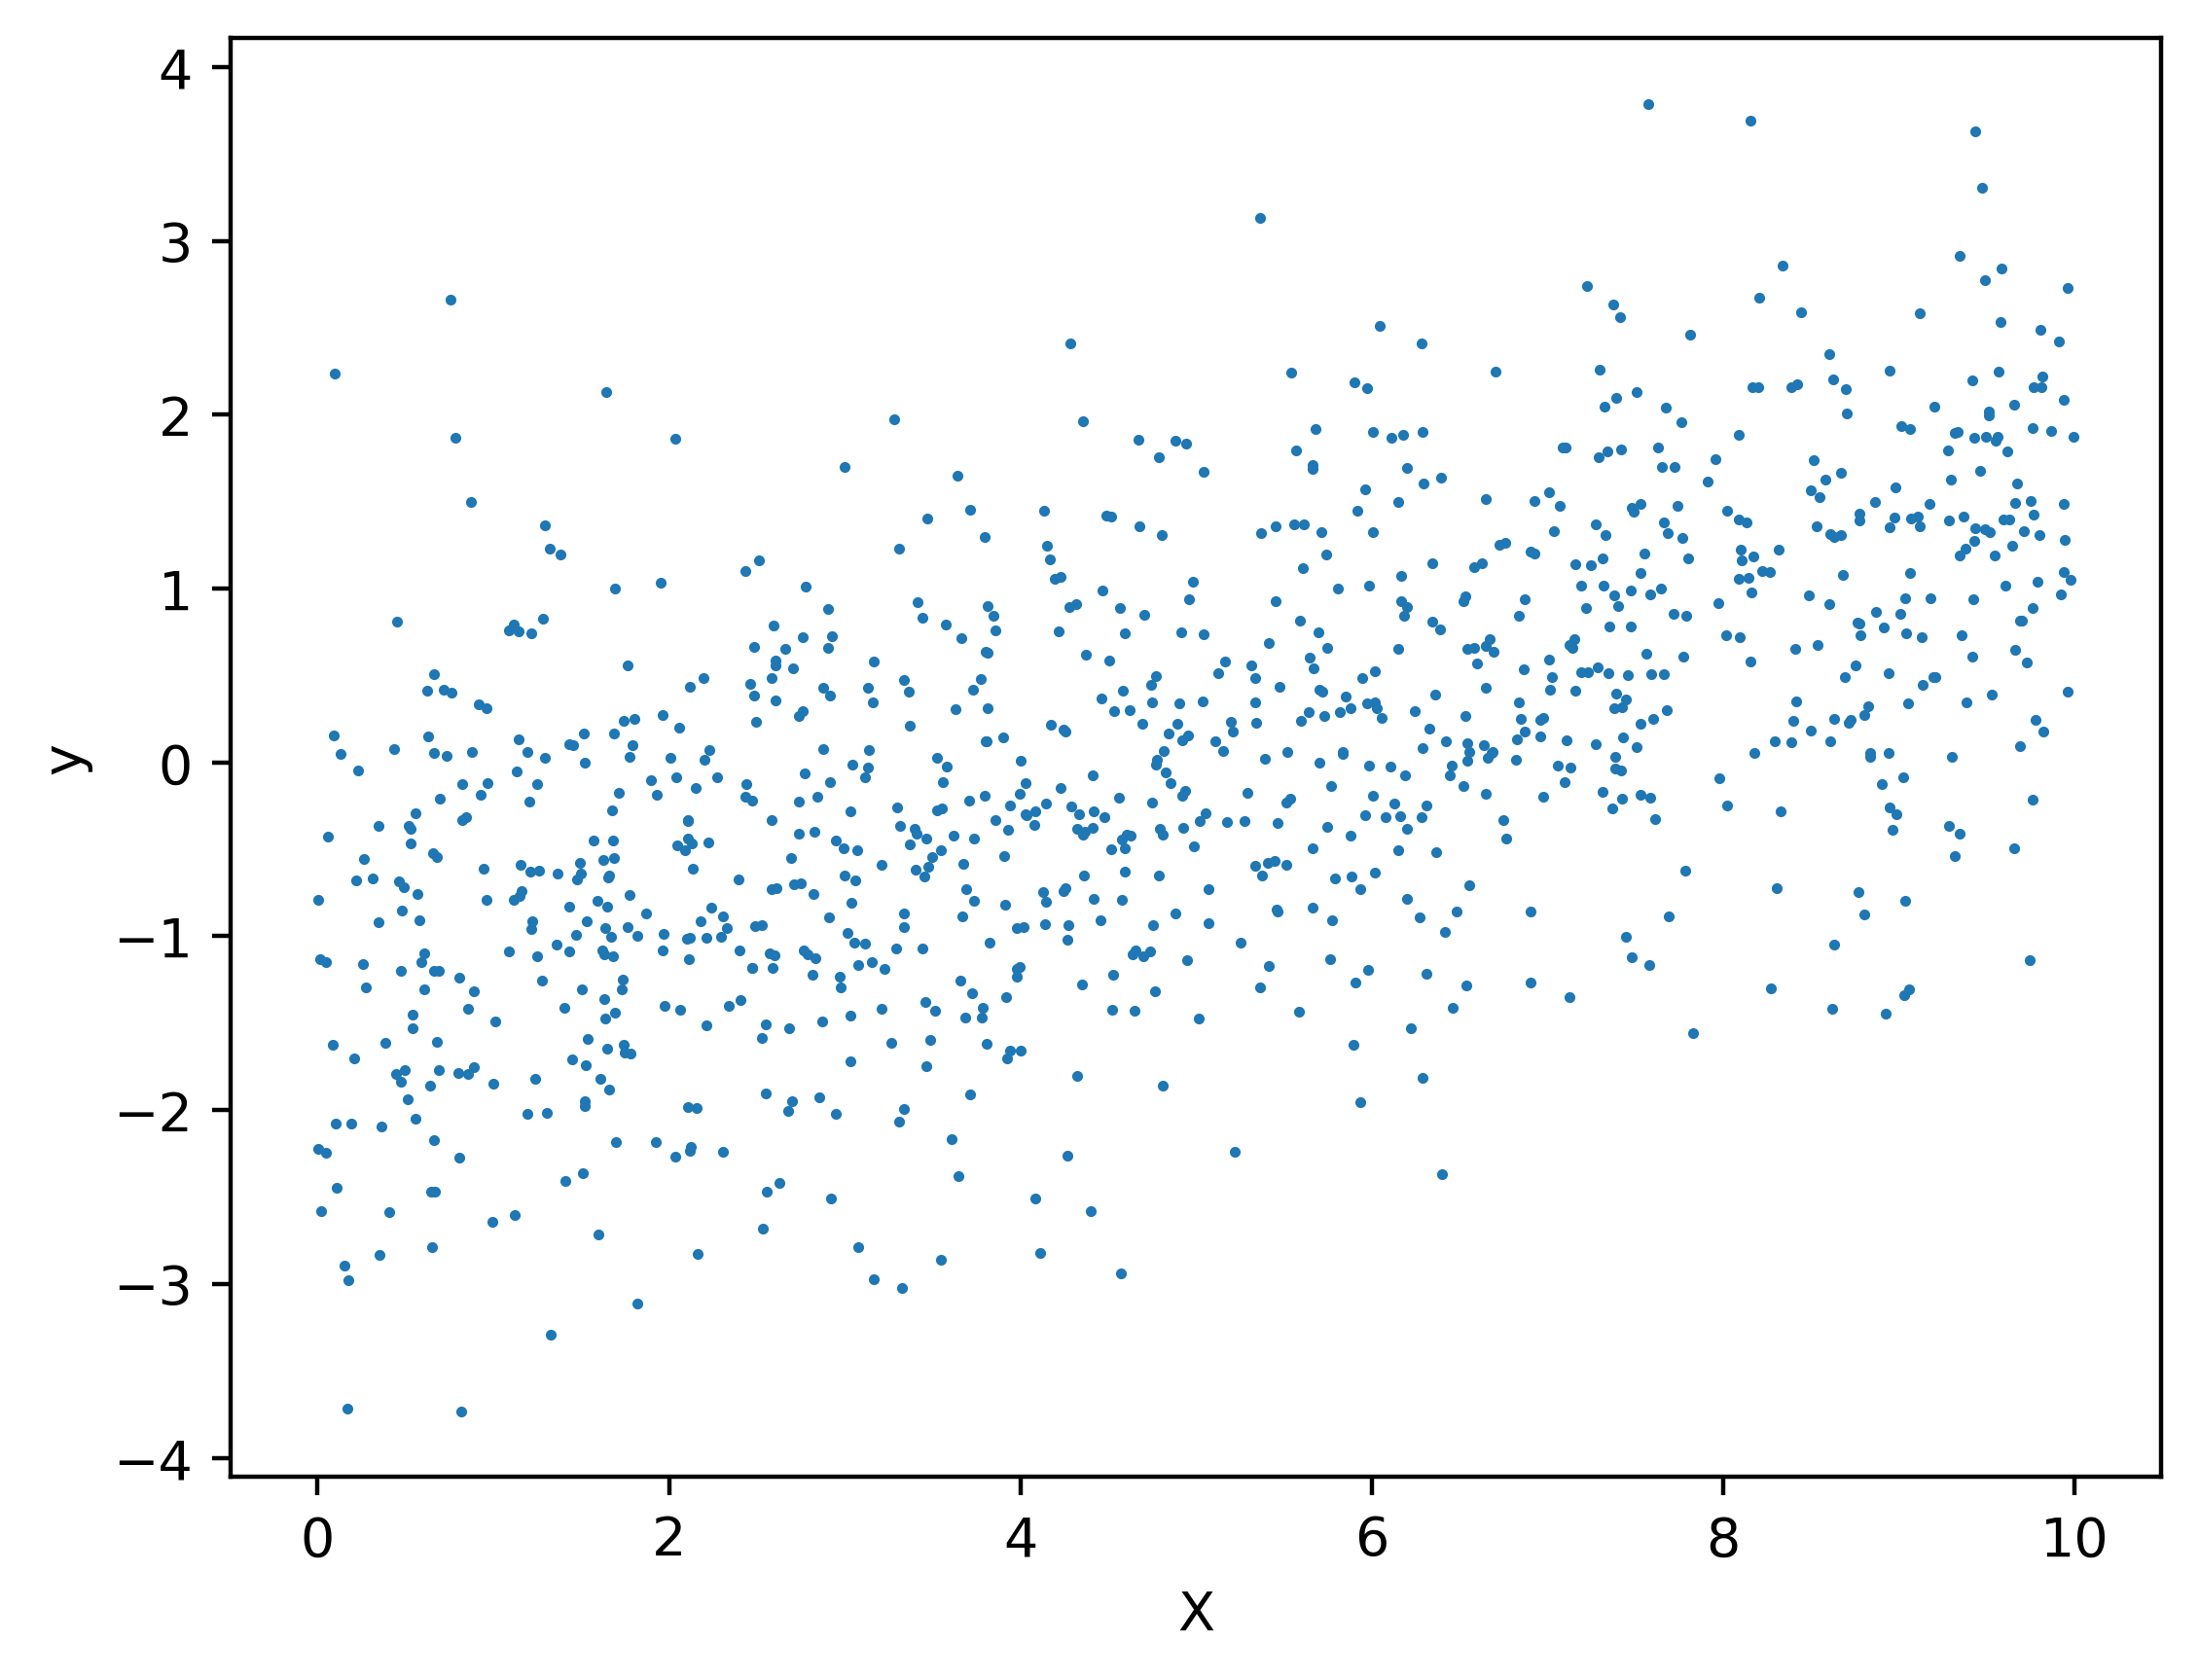

In [19]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')

# Regressão Linear com Scikit-Learn:

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
lin_reg

LinearRegression()

##### Ajustando o modelo e examinando os coeficientes:

In [22]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675907
[0.25711689]


##### Predizendo os valores na variável y_pred:

In [24]:
y_pred = lin_reg.predict(X.reshape(-1,1))

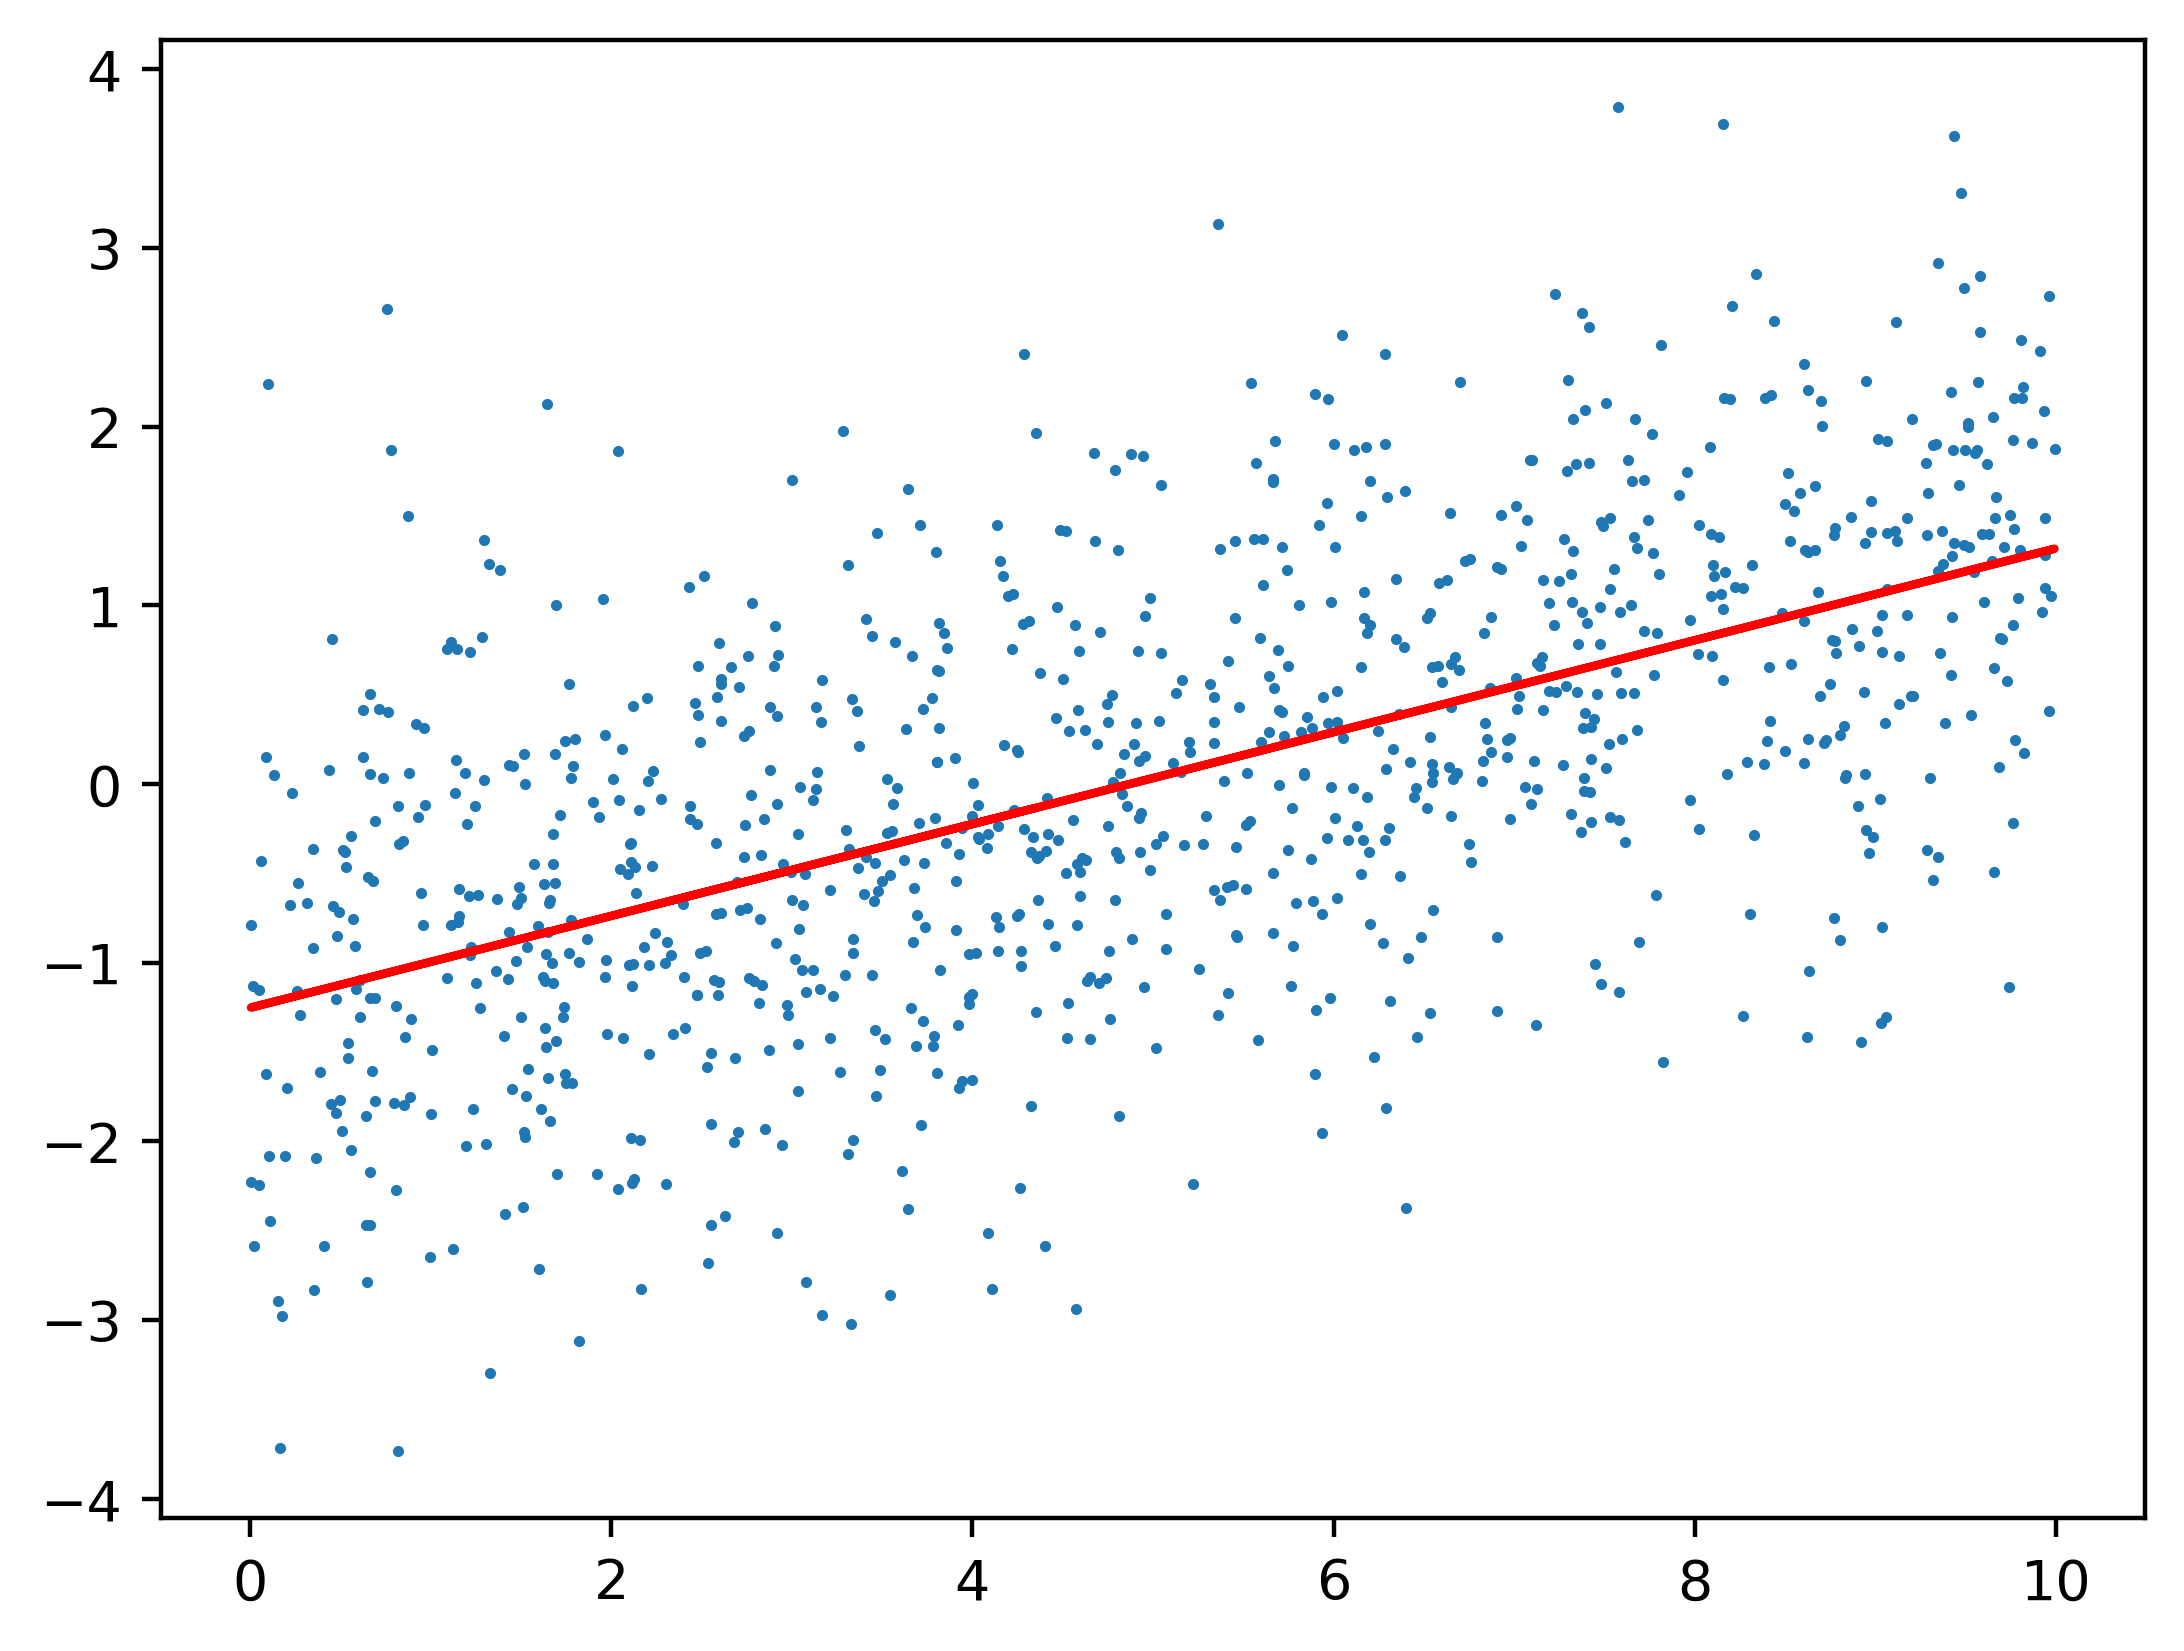

In [25]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

## Separando amostras de treino e test:

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


##### Verificando o balanceamento das classes:

In [29]:
np.mean(y_train)

0.223102526838873

In [30]:
np.mean(y_test)

0.21657603600225014

## Acurácia da Classificação

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [33]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [34]:
y_pred = example_lr.predict(X_test)

In [35]:
is_correct = y_pred == y_test

In [36]:
np.mean(is_correct)

0.7834239639977498

In [37]:
example_lr.score(X_test, y_test)

0.7834239639977498

#### Metrics do Scikit-Learn:

In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

### Taxa de verdadeiros positivos, taxa de falsos positivos e Matriz Confusão:

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

### Taxas de probabilidade do modelo:

In [42]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [45]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
np.unique(prob_sum)

array([1.])

In [48]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Numnero de Amostras')

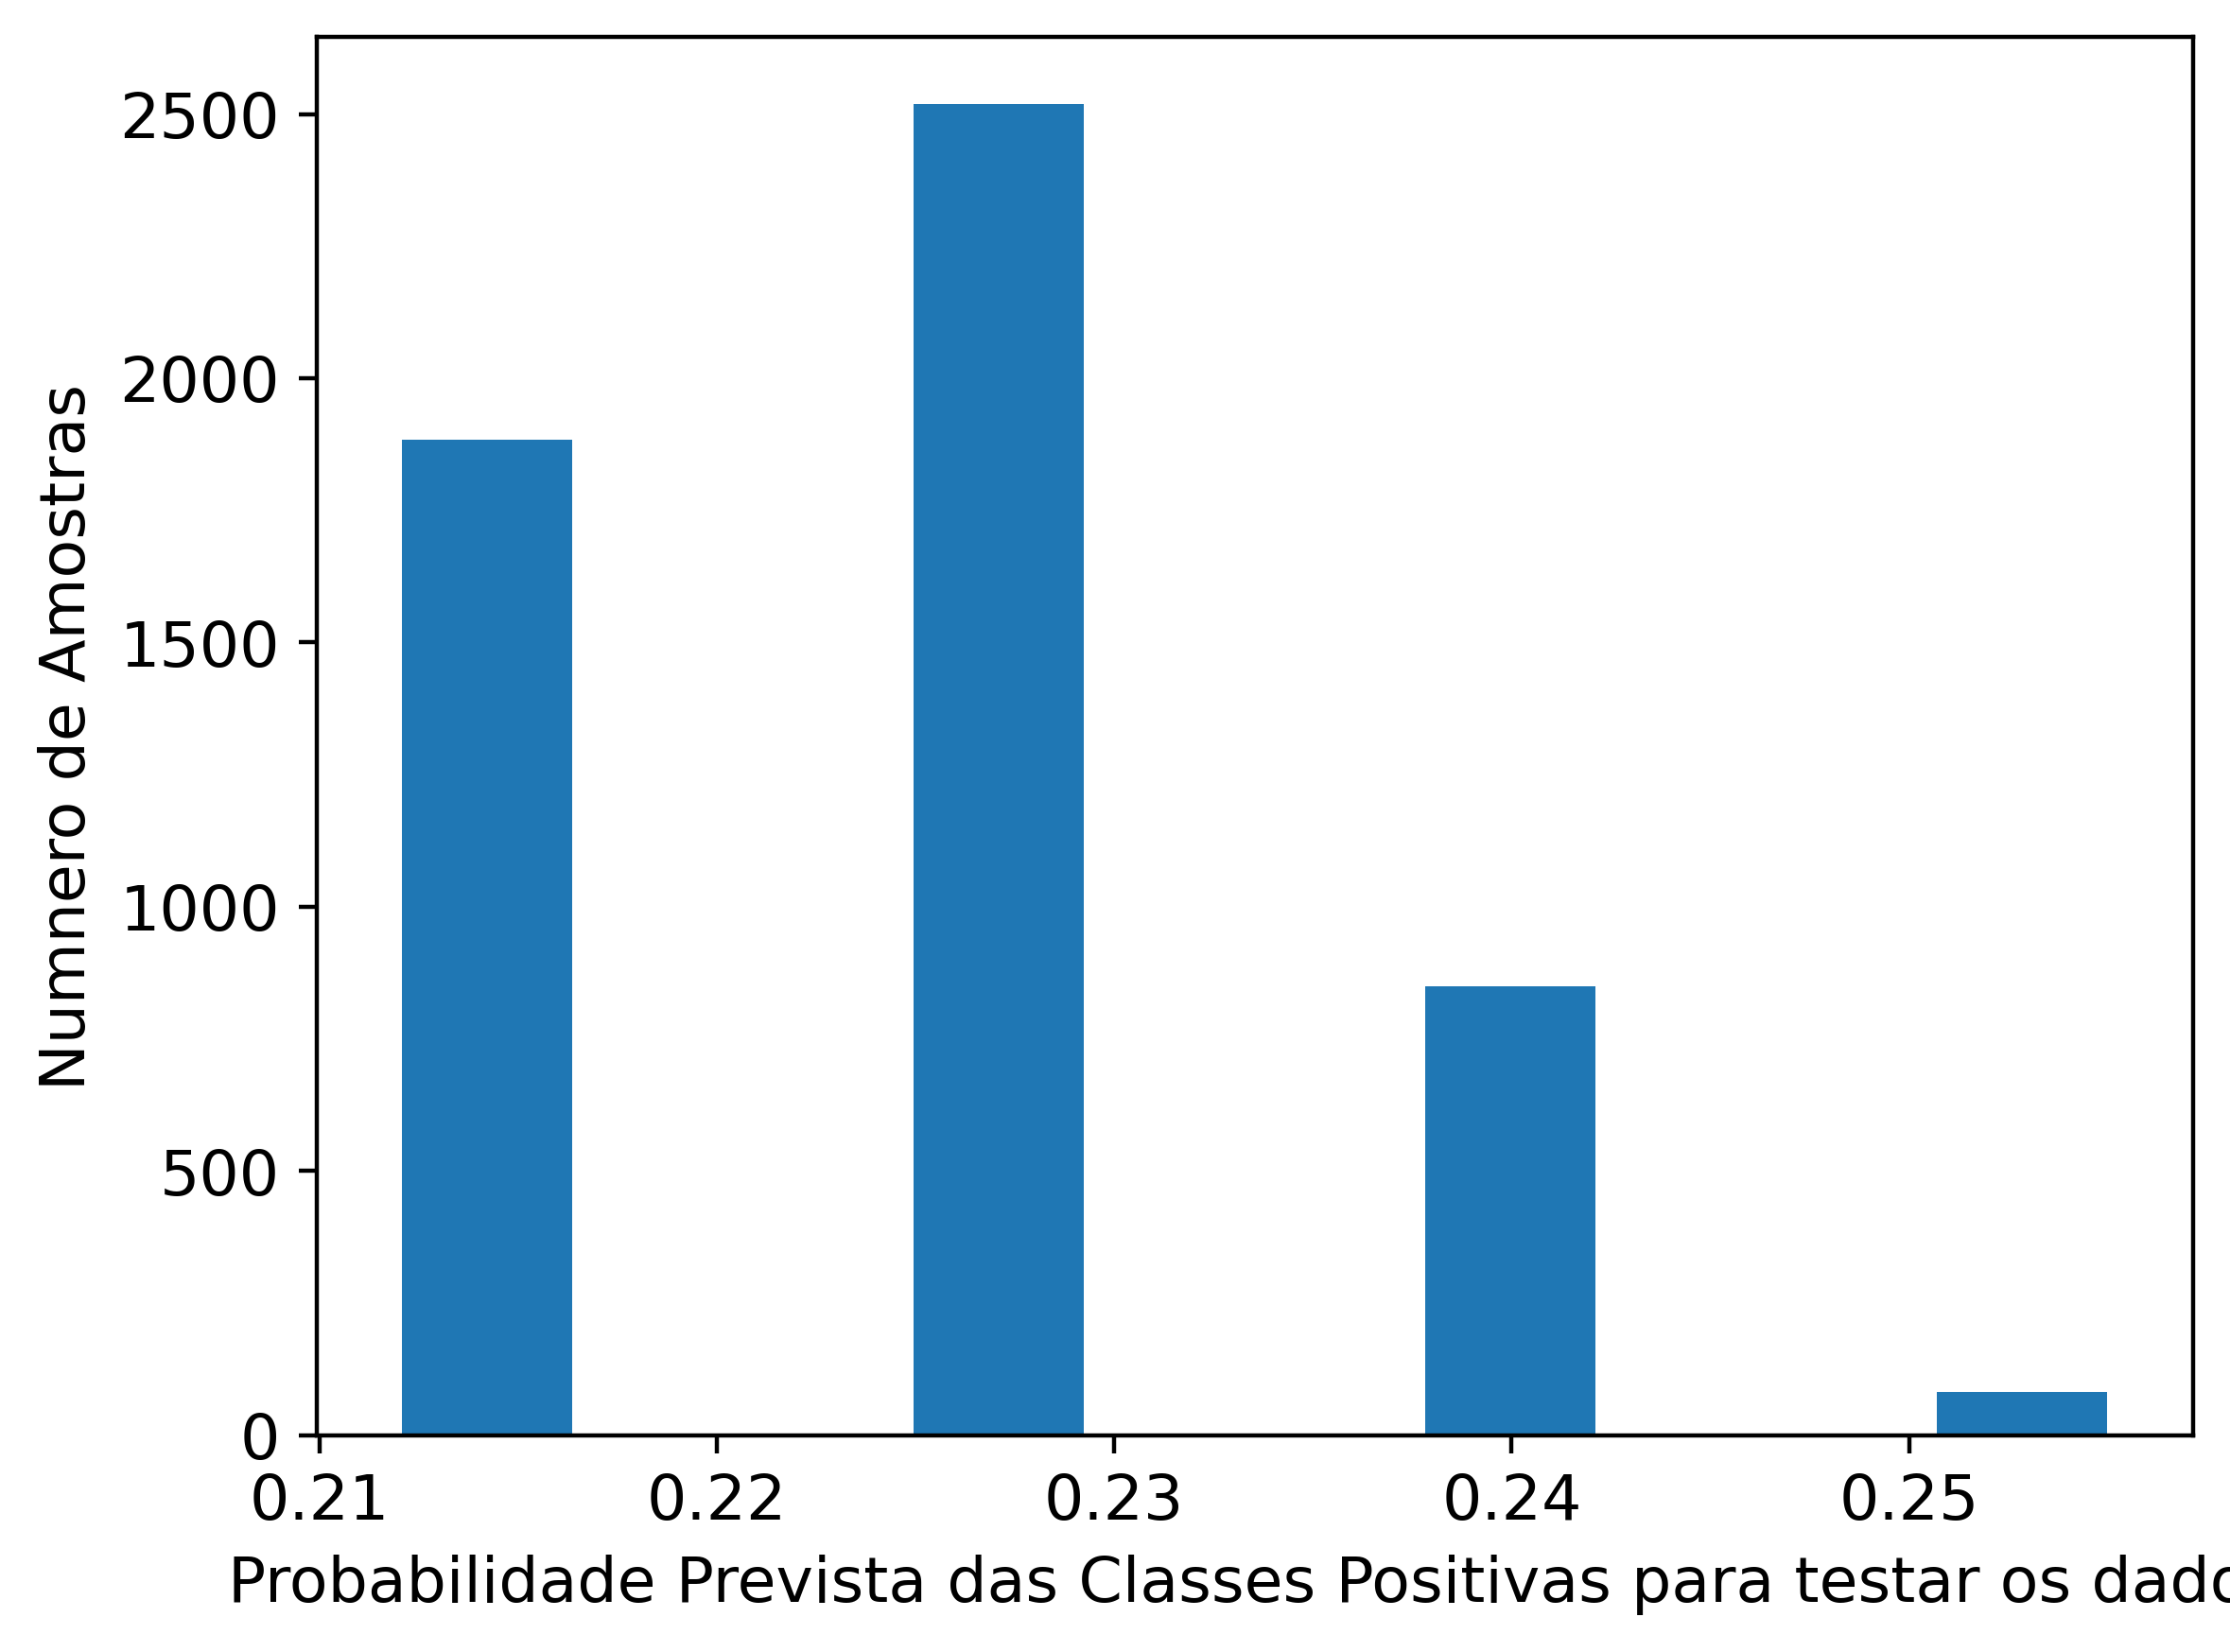

In [50]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Probabilidade Prevista das Classes Positivas para testar os dados')
plt.ylabel('Numnero de Amostras')

In [51]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Número de Amostras')

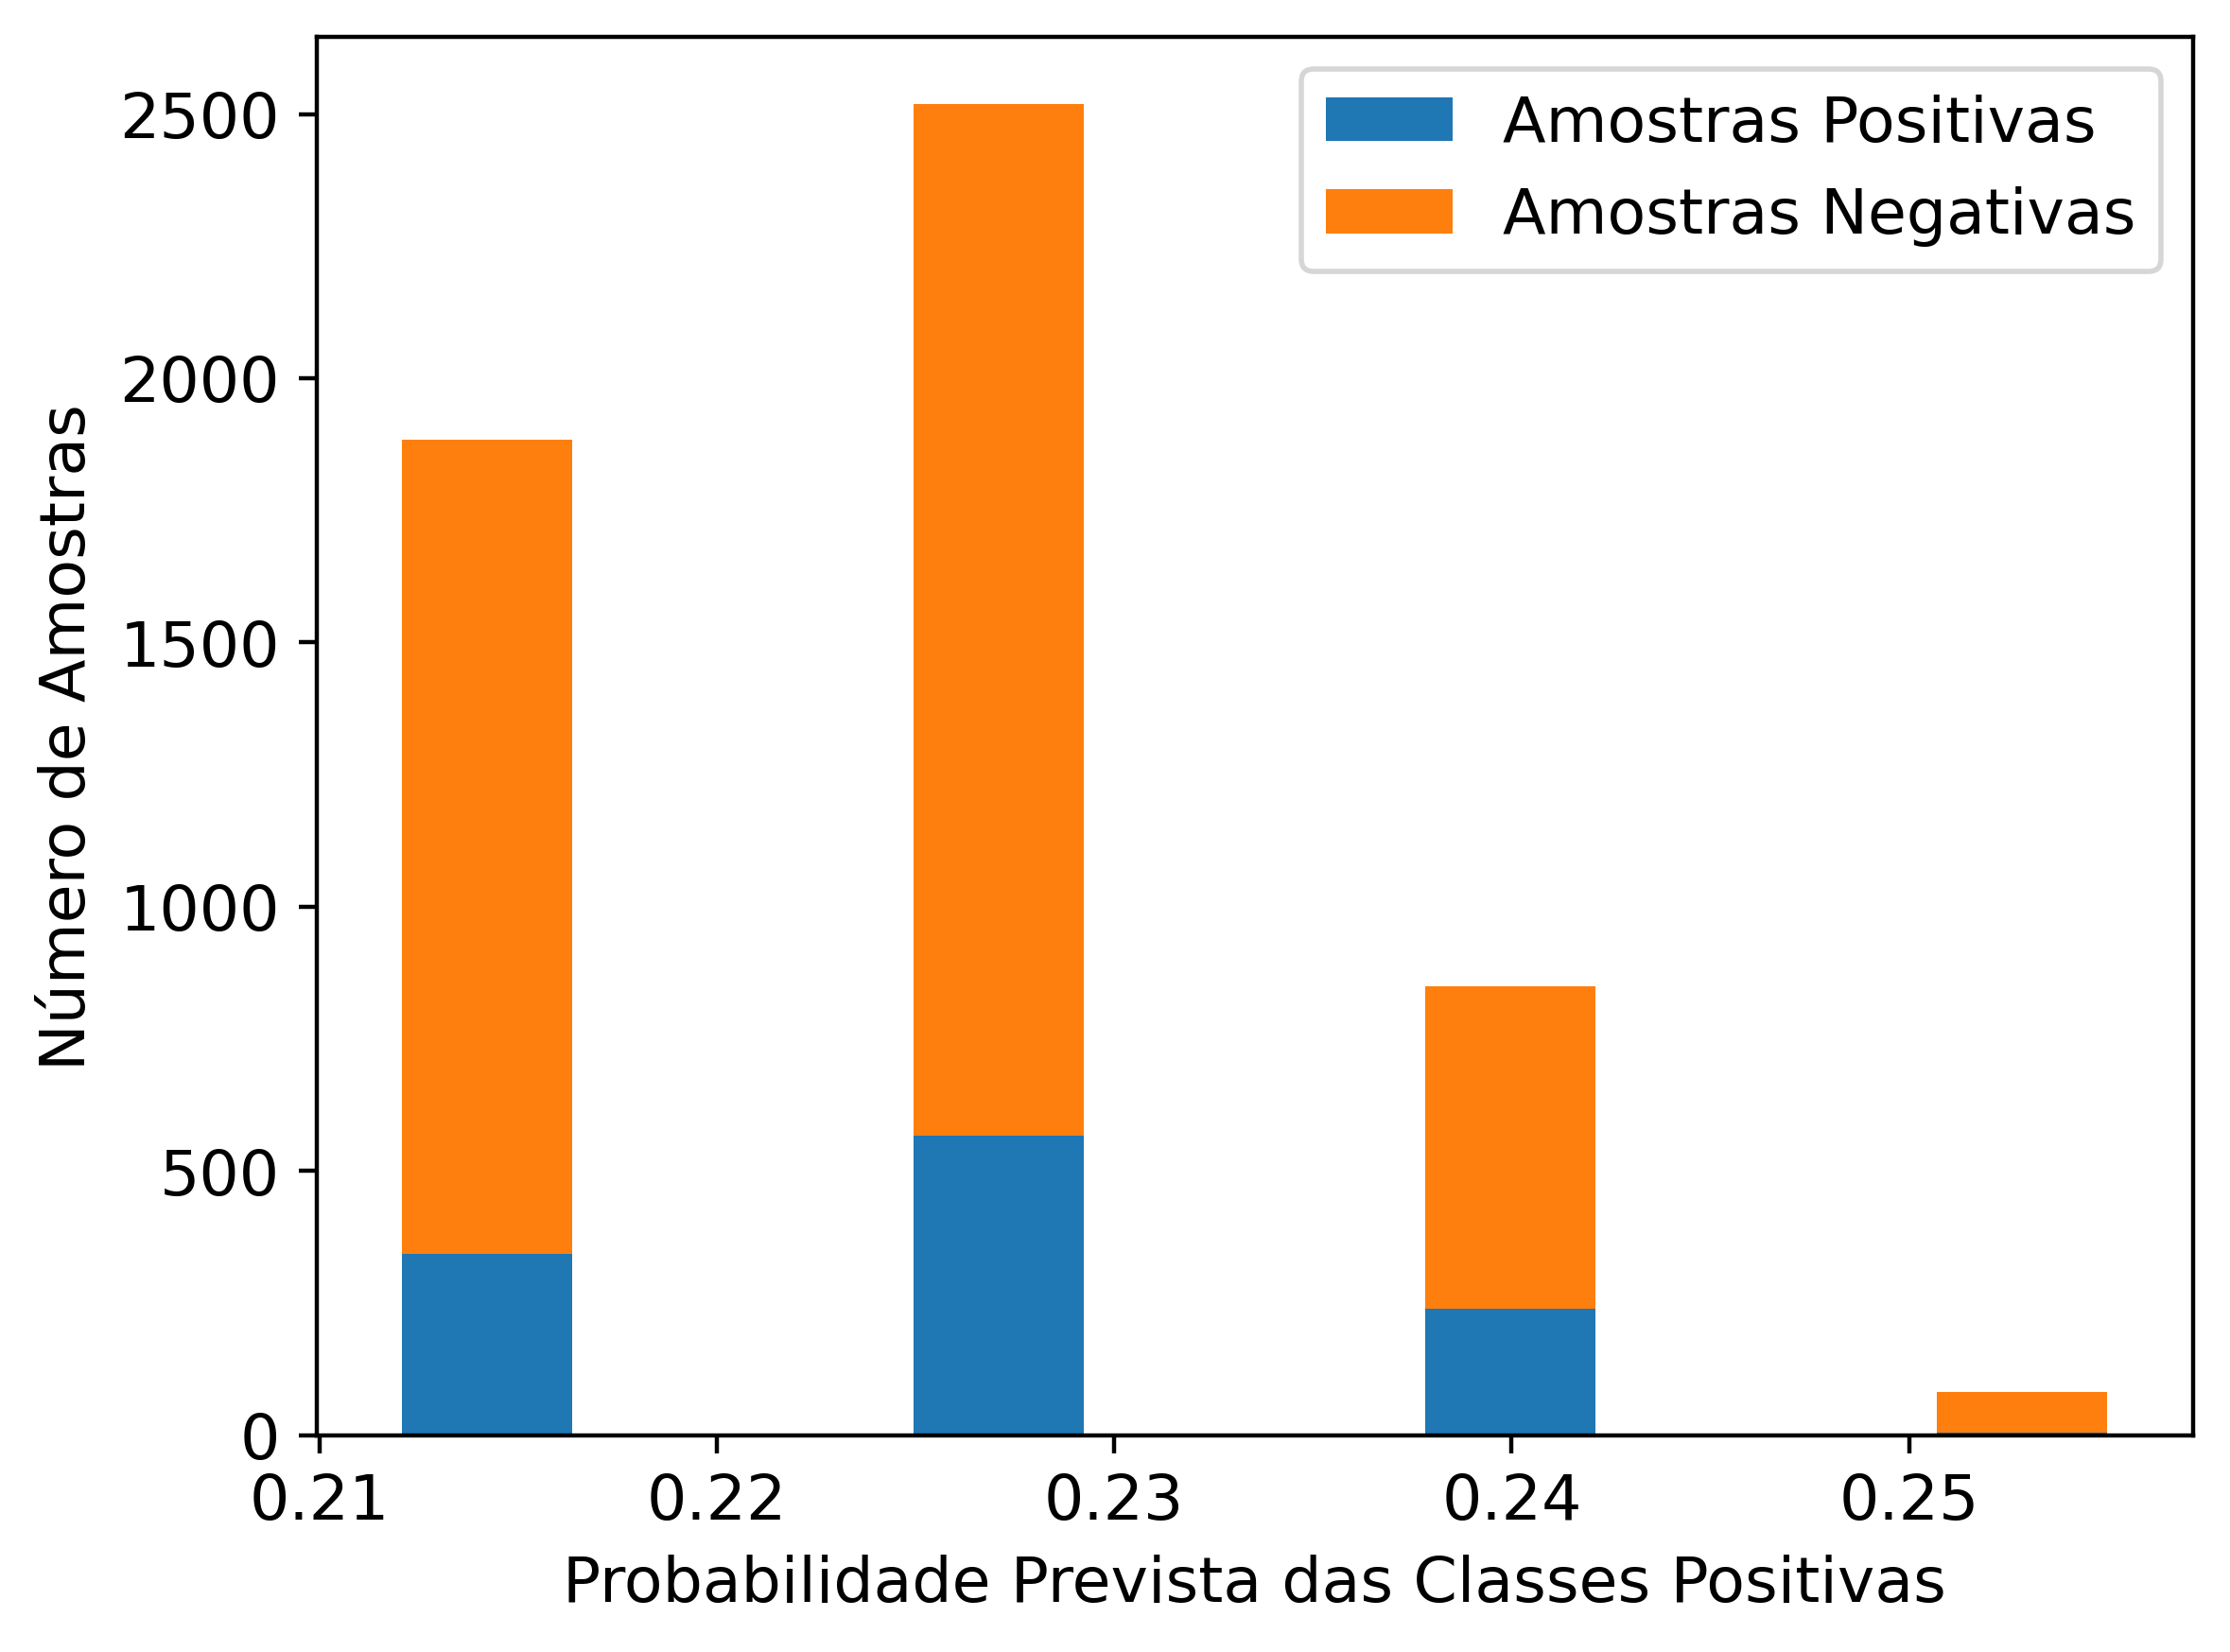

In [52]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Amostras Positivas', 'Amostras Negativas'])
plt.xlabel('Probabilidade Prevista das Classes Positivas')
plt.ylabel('Número de Amostras')

### Curva ROC:

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

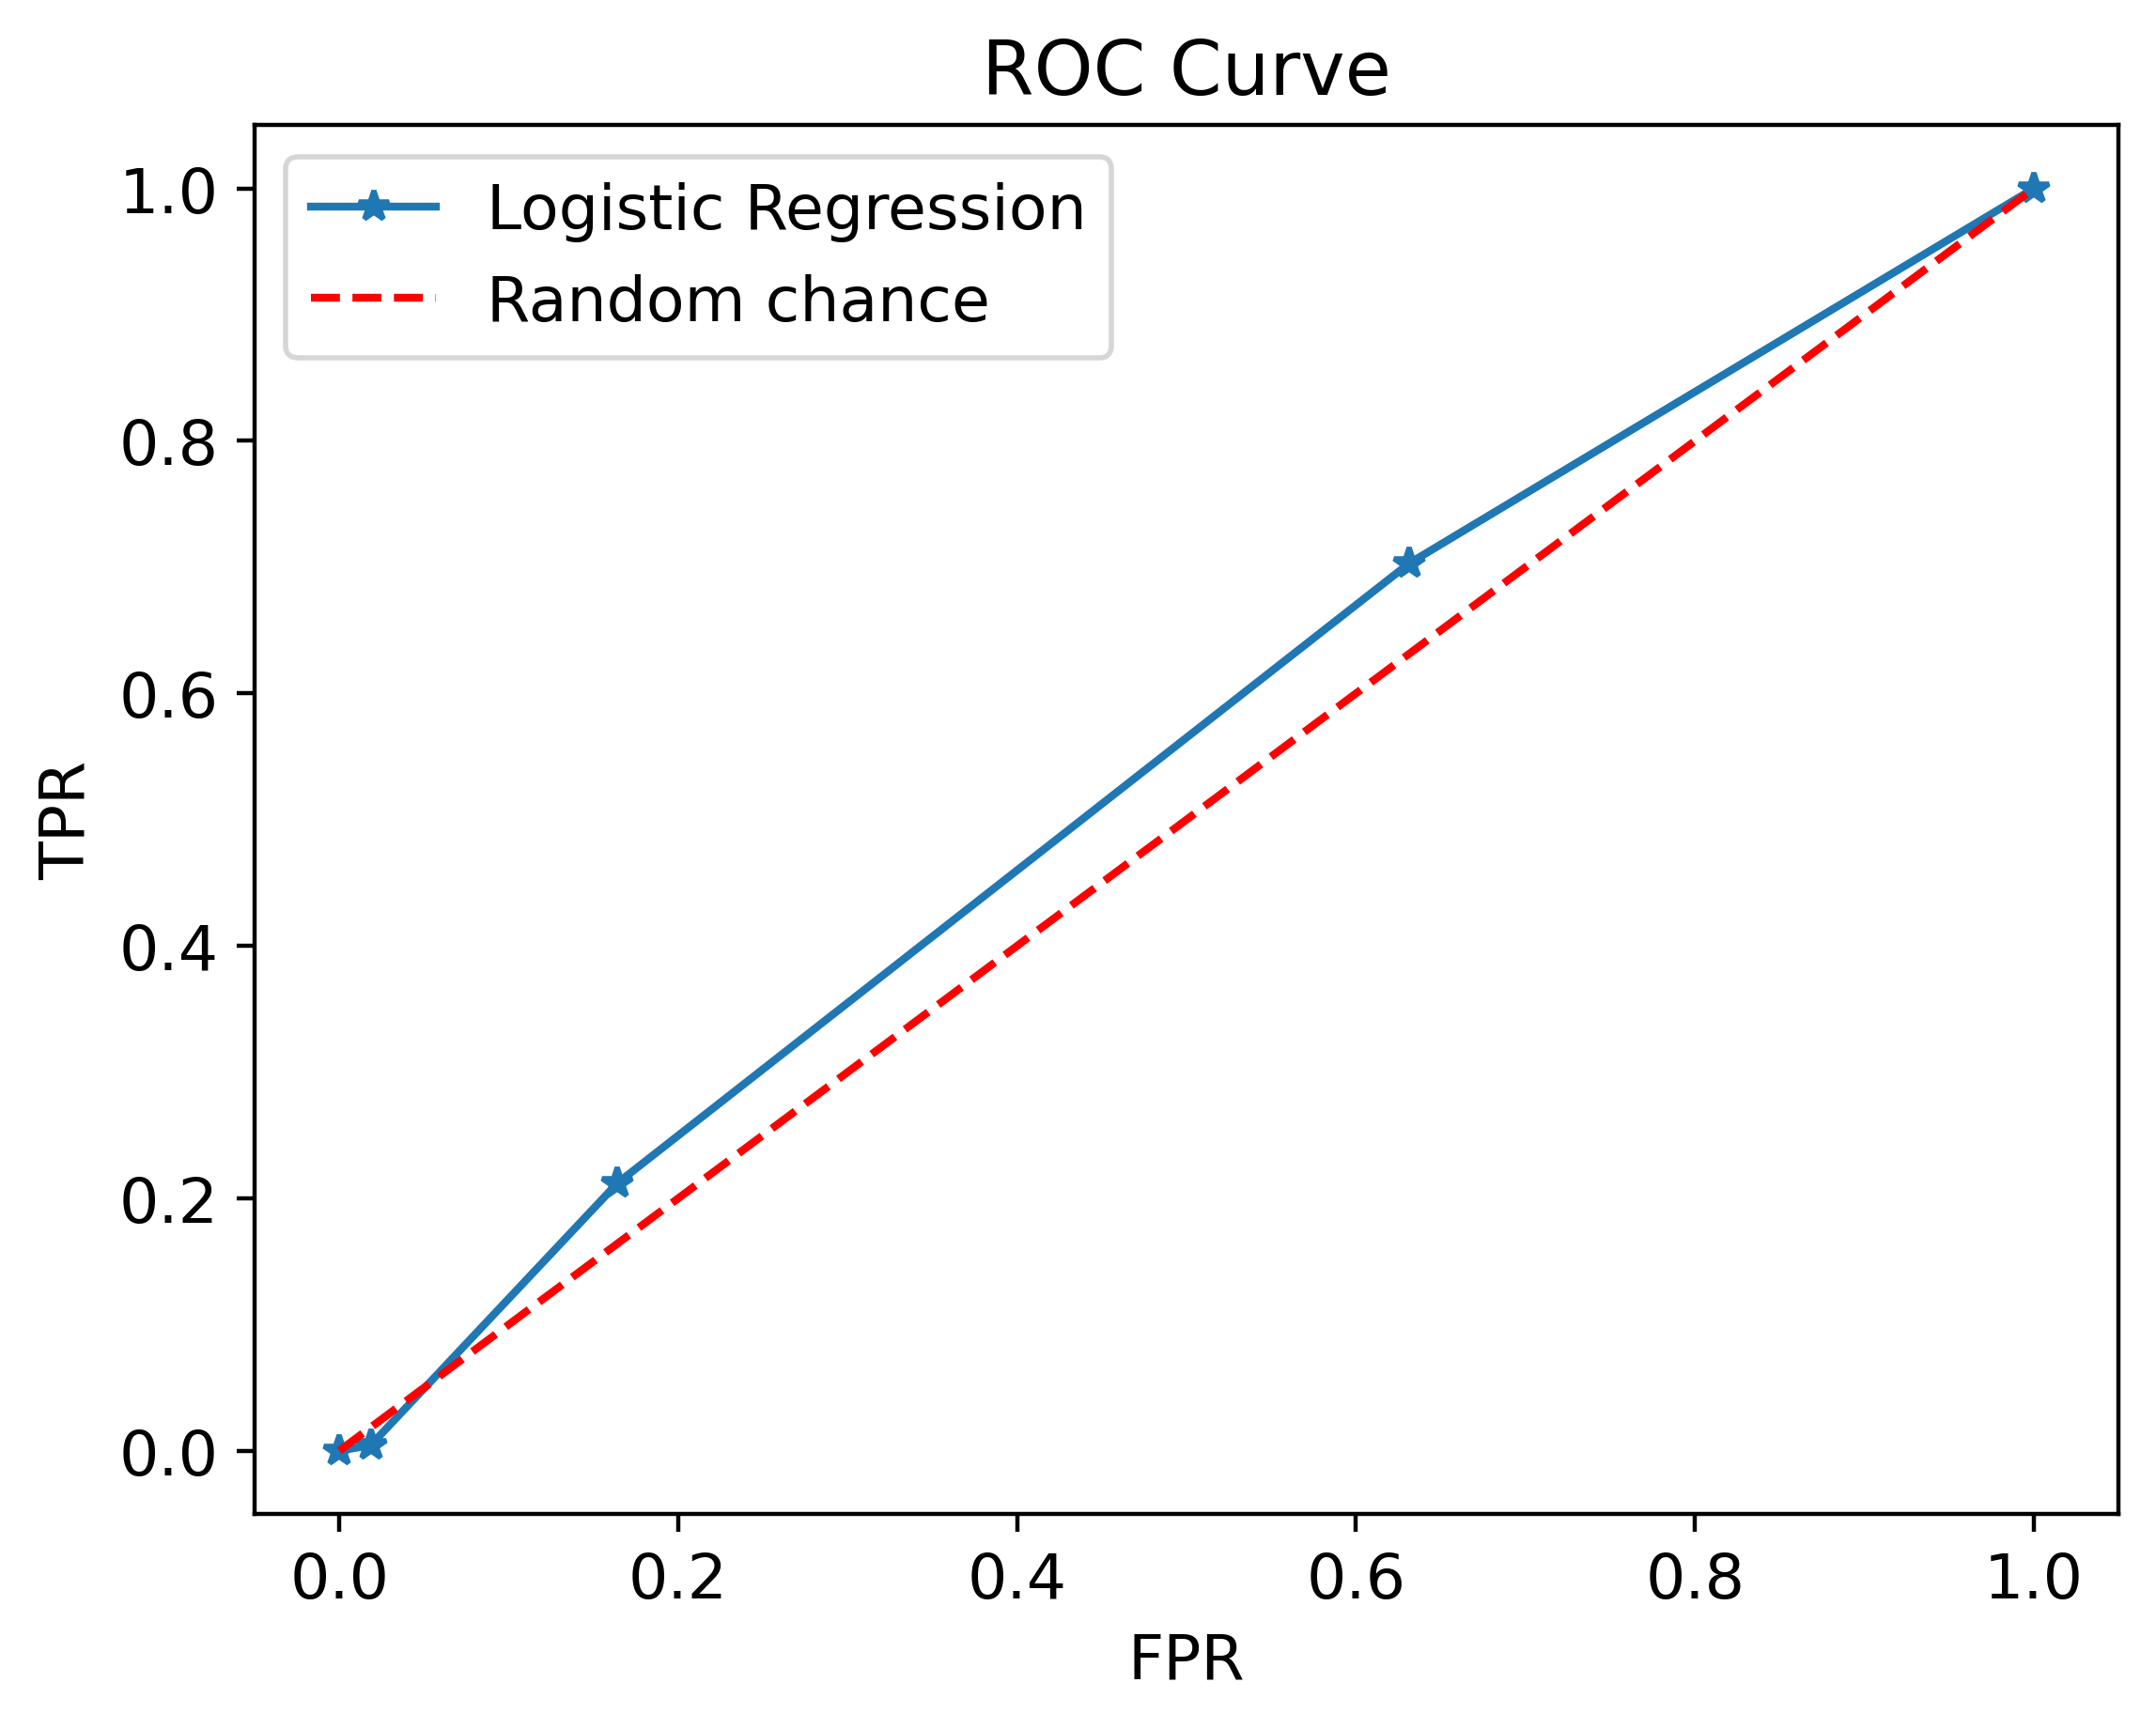

In [57]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [58]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [59]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [60]:
metrics.precision_recall_curve(y_test, pos_proba)

(array([0.21657604, 0.23536232, 0.26315789, 0.06097561, 1.        ]),
 array([1.        , 0.7030303 , 0.21212121, 0.004329  , 0.        ]),
 array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ]))